# Spam text Message Classification using Bag of Words:

#### Thirumurugan Ramar

In [1]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('spam.tsv',sep='\t')

In [3]:
data.head() #length indicates character length

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
print("No of Data Samples",len(data))

No of Data Samples 5572


In [6]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### The data is imbalanced! This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes.In order to get better accuracy,let's balance the data.

In [7]:
ham=data[data['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam=data[data['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
# Randomly select 747 samples in ham to balance the data
ham=ham.sample(747)

In [10]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [11]:
#Append spam and ham
data = ham.append(spam,ignore_index=True)

In [12]:
data.shape

(1494, 4)

## Exploratory Data Analysis:

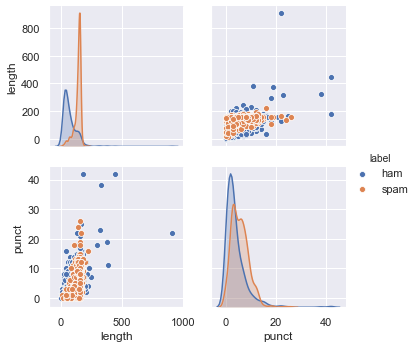

In [13]:
sns.pairplot(data, hue='label')

#### Generally,character length of spam messages is greater than that of ham messages.

In [14]:
data.head()

,label,message,length,punct
0,ham,True dear..i sat to pray evening and felt so.s...,75,7
1,ham,I'm turning off my phone. My moms telling ever...,169,9
2,ham,Nice talking to you! please dont forget my pix...,77,6
3,ham,Thanks for being there for me just to talk to ...,133,3
4,ham,Is that seriously how you spell his name?,41,1


In [15]:
# Train-test split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3,
                                                    random_state=0, shuffle = True, stratify=data['label'])

In [16]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Don't forget who owns you and who's private pr...
477     Where wuld I be without my baby? The thought a...
542                         Hi:)cts employee how are you?
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312          Good night my dear.. Sleepwell&amp;Take care
268                                Cold. Dont be sad dear
272     Oh great. I.ll disturb him more so that we can...
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [17]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

In [18]:
X_test

1127    For ur chance to win a £250 cash every wk TXT:...
421     Dad wanted to talk about the apartment so I go...
806     100 dating service cal;l 09064012103 box334sk38ch
547         Ü go home liao? Ask dad to pick me up at 6...
61      Juz now havent woke up so a bit blur blur... C...
                              ...                        
728                         He remains a bro amongst bros
1346    For your chance to WIN a FREE Bluetooth Headse...
376     SYMPTOMS when U are in love: "1.U like listeni...
296     Ill be at yours in about 3 mins but look out f...
1118    Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
Name: message, Length: 449, dtype: object

In [19]:
y_test

1127    spam
421      ham
806     spam
547      ham
61       ham
        ... 
728      ham
1346    spam
376      ham
296      ham
1118    spam
Name: label, Length: 449, dtype: object

## Bag of words model:

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
###vectorizer = TfidfVectorizer()
##X_train_vector = vectorizer.fit_transform(X_train)

In [22]:
### X_train_vector.shape

In [23]:
### X_train_vector

### Pipeline with Randomforest classifier:

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

Machine learning (ML) pipelines consist of several steps to train a model.Machine learning pipelines are cyclical and iterative as every step is repeated to continuously improve the accuracy of the model and achieve a successful algorithm

In [25]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))]) 
#njobs=-1 will use all the cores of CPU

In [26]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [27]:
y_pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 30, 194]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.99      0.93       225
        spam       0.99      0.87      0.92       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [30]:
accuracy_score(y_test, y_pred)

0.9287305122494433

In [31]:
clf.predict(["IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out."])

array(['spam'], dtype=object)

In [32]:
clf.predict(["you have won tickets to KGF 2 this summer."])

array(['ham'], dtype=object)

######  This is a spam :(

In [33]:
clf.predict(["My name is thiru"])

array(['ham'], dtype=object)

### Support Vector Machines:

In [34]:
from sklearn.svm import SVC

In [35]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [36]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [37]:
y_pred = clf.predict(X_test)

In [38]:
confusion_matrix(y_test, y_pred)

array([[220,   5],
       [ 20, 204]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       225
        spam       0.98      0.91      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [40]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [41]:
clf.predict(["My name is thiru"])

array(['ham'], dtype=object)

In [43]:
clf.predict(["You have won tickets to KGF 2 this summer"])

array(['spam'], dtype=object)

### Naive bayes:

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB(alpha=1))])

In [47]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1, class_prior=None, fit_prior=True))],
         verbose=False)

In [48]:
y_pred = clf.predict(X_test)

In [49]:
confusion_matrix(y_test, y_pred)

array([[216,   9],
       [ 12, 212]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.96      0.95       225
        spam       0.96      0.95      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [51]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [52]:
clf.predict(["You have won tickets to KGF 2 this summer"])

array(['spam'], dtype='<U4')